In [1]:
import pandas as pd
import gensim
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [7]:
# Define the list of model prefixes
variable_names = [
    'movies_1921_1930',
    'movies_1931_1940',
    'movies_1941_1950',
    'movies_1951_1960',
    'movies_1961_1970',
    'movies_1971_1980',
    'movies_1981_1990',
    'movies_1991_2000',
    'movies_2001_2010'
]

# Define word lists
competence_words = ['precocious', 'resourceful', 'inquisitive', 'sagacious', 'inventive', 'astute', 'adaptable', 'reflective', 'discerning', 'intuitive', 'inquiring', 'judicious', 'analytical', 'luminous', 'venerable', 'imaginative', 'shrewd', 'thoughtful', 'sage',
'smart', 'ingenious', 'clever', 'brilliant', 'logical', 'intelligent', 'apt', 'genius', 'wise']  
physical_appearance_words = ['alluring', 'voluptuous', 'blushing', 'homely', 'plump', 'sensual', 'gorgeous', 'slim', 'bald', 'athletic', 'fashionable', 'stout', 'ugly', 'muscular', 'slender', 'feeble', 'handsome', 'healthy', 'attractive', 'fat', 'weak', 'thin', 'pretty',
'beautiful', 'strong']  

# Initialize empty DataFrames to store aggregated bias values over time
aggregated_bias_competence = pd.DataFrame(index=competence_words, columns=['Mean_Bias'])
aggregated_bias_appearance = pd.DataFrame(index=physical_appearance_words, columns=['Mean_Bias'])


In [8]:
# Calculate bias for each model for competence words
for name in variable_names:
    # Load the model
    model_filename = f"models/word2vec-{name}-text.model"
    model = gensim.models.Word2Vec.load(model_filename)
    
    # Calculate bias between "woman" and each competence word
    for word in competence_words:
        if word in model.wv.key_to_index:  # Check if the word is present in the vocabulary
            bias = model.wv.similarity('woman', word) - model.wv.similarity('man', word)
            # Accumulate bias values over time
            if word in aggregated_bias_competence.index:
                if pd.isnull(aggregated_bias_competence.loc[word, 'Mean_Bias']):
                    aggregated_bias_competence.loc[word, 'Mean_Bias'] = bias
                else:
                    aggregated_bias_competence.loc[word, 'Mean_Bias'] += bias
        else:
            print(f"Word '{word}' not present in the vocabulary of model '{name}'")

# Calculate bias for each model for physical appearance words
for name in variable_names:
    # Load the model
    model_filename = f"models/word2vec-{name}-text.model"
    model = gensim.models.Word2Vec.load(model_filename)
    
    # Calculate bias between "woman" and each physical appearance word
    for word in physical_appearance_words:
        if word in model.wv.key_to_index:  # Check if the word is present in the vocabulary
            bias = model.wv.similarity('woman', word) - model.wv.similarity('man', word)
            # Accumulate bias values over time
            if word in aggregated_bias_appearance.index:
                if pd.isnull(aggregated_bias_appearance.loc[word, 'Mean_Bias']):
                    aggregated_bias_appearance.loc[word, 'Mean_Bias'] = bias
                else:
                    aggregated_bias_appearance.loc[word, 'Mean_Bias'] += bias
        else:
            print(f"Word '{word}' not present in the vocabulary of model '{name}'")


Word 'precocious' not present in the vocabulary of model 'movies_1921_1930'
Word 'sagacious' not present in the vocabulary of model 'movies_1921_1930'
Word 'inventive' not present in the vocabulary of model 'movies_1921_1930'
Word 'adaptable' not present in the vocabulary of model 'movies_1921_1930'
Word 'discerning' not present in the vocabulary of model 'movies_1921_1930'
Word 'judicious' not present in the vocabulary of model 'movies_1921_1930'
Word 'venerable' not present in the vocabulary of model 'movies_1921_1930'
Word 'precocious' not present in the vocabulary of model 'movies_1931_1940'
Word 'sagacious' not present in the vocabulary of model 'movies_1931_1940'
Word 'inventive' not present in the vocabulary of model 'movies_1931_1940'
Word 'adaptable' not present in the vocabulary of model 'movies_1931_1940'
Word 'discerning' not present in the vocabulary of model 'movies_1931_1940'
Word 'judicious' not present in the vocabulary of model 'movies_1931_1940'
Word 'venerable' not 

In [9]:
# Calculate mean bias over time
aggregated_bias_competence['Mean_Bias'] /= len(variable_names)
aggregated_bias_appearance['Mean_Bias'] /= len(variable_names)

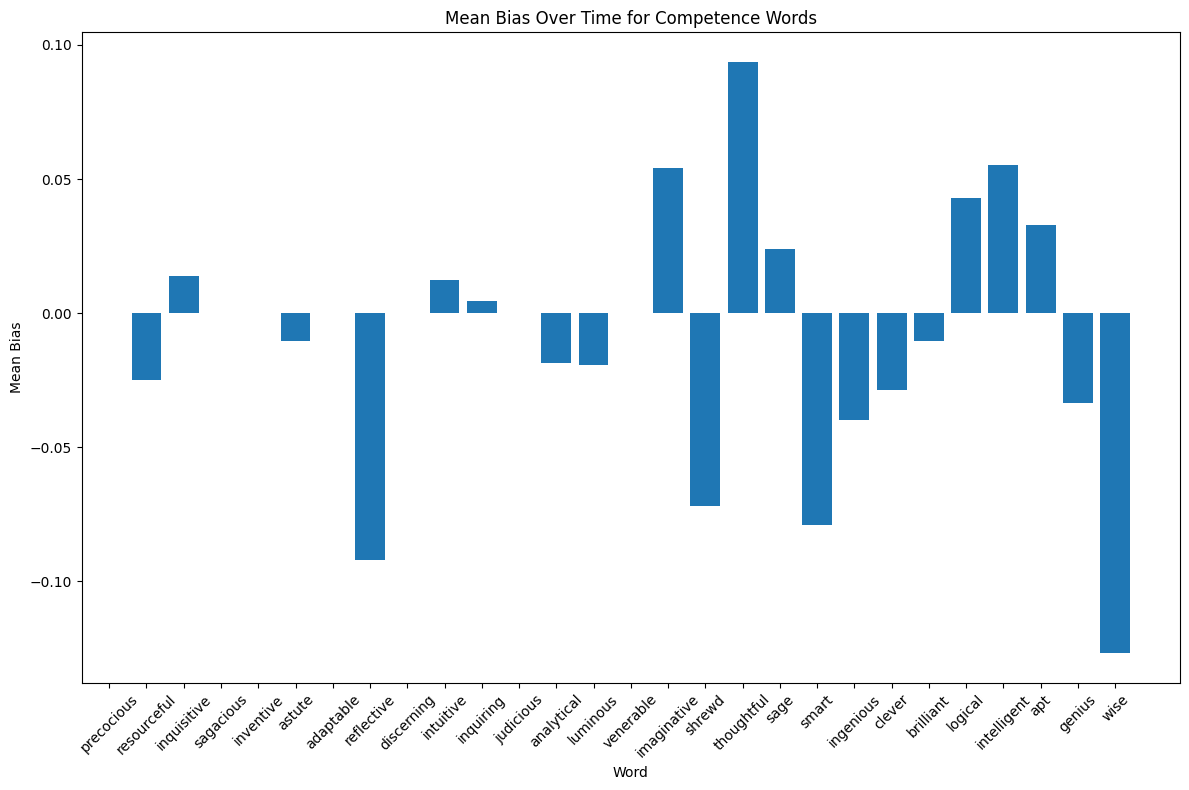

In [10]:
# Plotting mean bias over time for competence words
plt.figure(figsize=(12, 8))
plt.bar(aggregated_bias_competence.index, aggregated_bias_competence['Mean_Bias'])
plt.title('Mean Bias Over Time for Competence Words')
plt.xlabel('Word')
plt.ylabel('Mean Bias')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

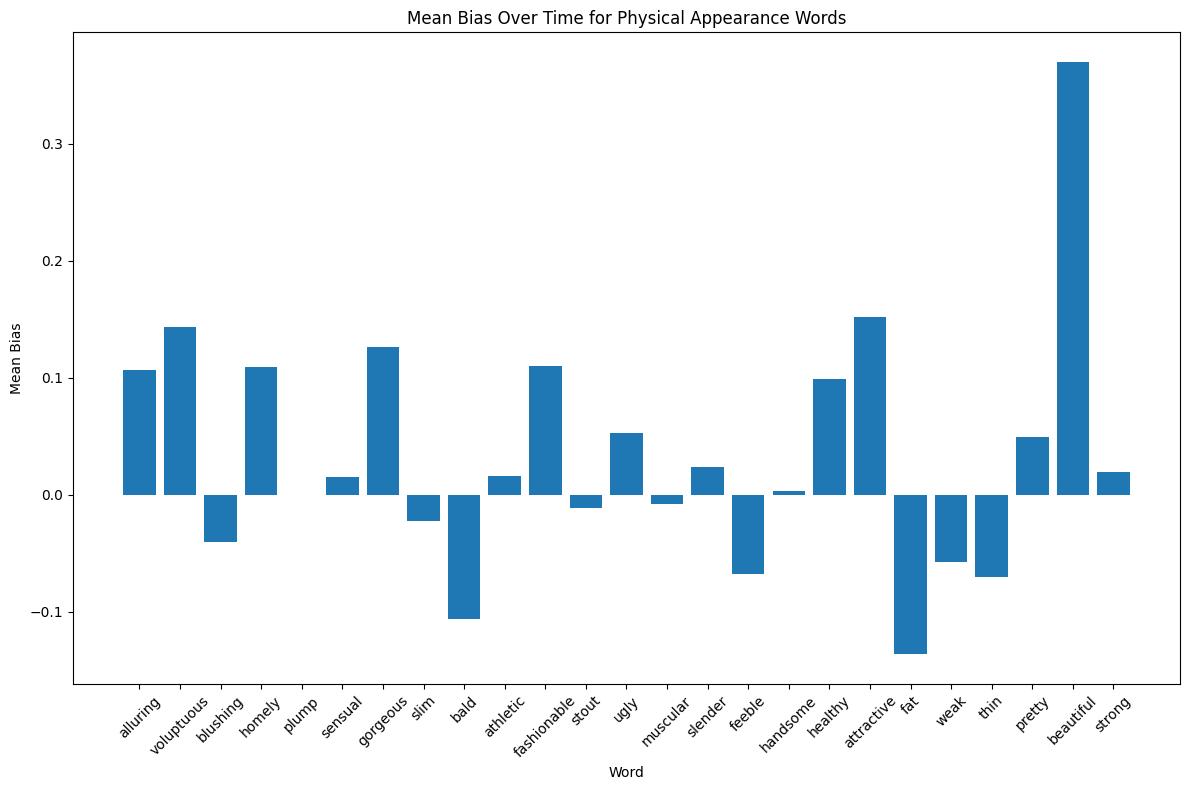

In [11]:
# Plotting mean bias over time for physical appearance words
plt.figure(figsize=(12, 8))
plt.bar(aggregated_bias_appearance.index, aggregated_bias_appearance['Mean_Bias'])
plt.title('Mean Bias Over Time for Physical Appearance Words')
plt.xlabel('Word')
plt.ylabel('Mean Bias')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The plots display the ```mean bias over time``` for competence words and physical appearance words. In competence words, ```"wise"``` exhibits the highest negative bias, whereas ```"thoughtful"``` demonstrates the highest positive bias; in physical appearance words, ```"beautiful"``` shows the highest positive bias.

- the negative bias towards "wise" and positive bias towards "beautiful" could indicate underlying gender biases and societal expectations regarding intelligence and physical attractiveness.